# Ομαδα 57: Lab 1 UCI Dataset

In [ ]:
import pandas as pd
import numpy as np
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade numpy
!pip install --upgrade matplotlib 
!pip install --upgrade scipy 
!pip install --upgrade pandas

### Import CSV File

In [ ]:
data = pd.read_csv('hepatitis.data')

In [ ]:
data.head()

,Class,age,sex,steroid,antivirals,fatigue,maise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk prosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


# Μέρος 1. UCI dataset

# Εισαγωγή και επισκόπηση

### Σύντομη παρουσίαση του dataset δηλαδή ποιο είναι το πρόβλημα που περιγράφει:
Το dataset που ανέλαβε η ομάδα μας ονομάζετε 'hepatitis'. Με μια ανασκόπηση του συμπαιρένουμε ότι αναφέρεται στη νόσο της ηπατίτιδας με δεδομένα διάφορους ασθενείς και χαρακτηριστικά που παρουσιάζουν ως προς τη μελέτη της νόσου.

Στο αρχικό file χρειάστηκαν να γίνουν 2 αλλαγές:
1. Στο dataset χρειάστηκε να προστεθεί το culumn με τα ονόματα των χαρακτηριστικών(γραμμών) των ασθενών καθώς έλειπε.
2. Να αφαιρεθούν όλα τα δείγματα με τουλάχιστον ένα ελλειπή στοιχείο('?').

In [ ]:
row_length = len(data)
col_length = len(data.columns)
print("Number of rows (samples):" , row_length , " Number of columns(characterisrics): " , col_length)

Number of rows (samples): 155  Number of columns(characterisrics):  20


Το πλήθος των δειγμάτων είναι 155 και τα χαρακτηριστικών 20. Όλα τα χαρακτηριστικά είναι σε μορφή ακέραιων αριθμών εκτός απο τα 'bilirubin' και 'albumin' όπου είναι σε μορφή δεκαδικού.

**Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**

1. Δεν υπήρχαν επικεφαλίδες τις προσθέσαμε εμείς.
2. Δεν υπάρχει αρίθμηση γραμμών.

**Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;**

Οι ετικέτες των κλάσεων είναι ('DIE', 'LIVE') η οποία βρίσκονται στην πρώτη κολόνα.

In [ ]:
missing_data = pd.read_csv('number_of_missing.data')
missing_data.rename(index={0:"Number of missing data per column"})

,Class,age,sex,steroid,antivirals,fatigue,maise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk prosphate,sgot,albumin,protime,histology
Number of missing data per column,0,0,0,1,0,1,1,1,10,11,5,5,5,5,6,29,4,16,67,0


In [ ]:
df2 = data[data == "?"]
# Drop rows that has all NaN values
df2=df2.dropna(how='all')
missing = len(df2)
percentage = missing/row_length*100
print("Samples with missing values: ", missing, " Percetnage : ", percentage, " % ")

Samples with missing values:  75  Percetnage :  48.38709677419355  % 


Με την εκτέλεση του πιο πάνω κώδικα φαίνεται ότι 75 δείγματα έχουν απουσιάζουσες τιμές ποσοστό 0.4839 στο σύνολο των δεδομένων.

**Ποιος είναι το πλήθος των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε αν το dataset είναι ισορροπημένο ή όχι.**

Το πλήθος των κλάσεων είναι 2.

In [ ]:
lived = len(data[data["Class"] == 2])
passed = len(data[data["Class"] == 1])
print("Percentage of samples in class 'LIVE'¨:" , lived/row_length*100, " %, ", "Percentage of samples in class 'DIE':" , passed/row_length*100, " % ")

Percentage of samples in class 'LIVE'¨: 79.35483870967742  %,  Percentage of samples in class 'DIE': 20.64516129032258  % 


Το dataset μας δεν είναι ισορροπημένο εφόσον το μέγεθος της μίας κλάσης είναι μεγαλύτερο απο 1.5 φορές της δεύτερης (80-20).

# Προετοιμασία

In [ ]:
data=data.replace('?', np.nan)
data=data.dropna().reset_index(drop=True)
data_size = len(data)
data


,Class,age,sex,steroid,antivirals,fatigue,maise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk prosphate,sgot,albumin,protime,histology
0,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
1,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
2,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
3,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
4,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2,45,1,2,1,2,2,2,2,2,2,2,2,2,1.30,85,44,4.2,85,2
76,1,49,1,1,2,1,1,2,2,2,1,1,2,2,1.40,85,70,3.5,35,2
77,2,31,1,1,2,1,2,2,2,2,2,2,2,2,1.20,75,173,4.2,54,2
78,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


Διαχωρίσαμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο (test set) με 30% των δειγμάτων στο test set,

In [ ]:
test_perc = int(data_size*0.3)
test_set = data.iloc[:test_perc,:]
test_set

,Class,age,sex,steroid,antivirals,fatigue,maise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk prosphate,sgot,albumin,protime,histology
0,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
1,2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1
2,2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1
3,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
4,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1
5,2,38,1,1,2,1,1,1,2,2,2,2,1,2,2.00,72,89,2.9,46,1
6,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1
7,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.70,53,42,4.1,85,2
8,2,38,1,1,1,2,2,2,1,1,2,2,2,2,0.70,70,28,4.2,62,1
9,2,22,2,2,1,1,2,2,2,2,2,2,2,2,0.90,48,20,4.2,64,1


και 70% σε train set

In [ ]:
train_set= data.iloc[test_perc:,:] 
train_set

,Class,age,sex,steroid,antivirals,fatigue,maise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk prosphate,sgot,albumin,protime,histology
24,2,65,1,2,2,1,1,2,2,1,1,1,1,2,0.30,180,53,2.9,74,2
25,2,52,1,1,1,2,2,2,2,2,2,2,2,2,0.70,75,55,4.0,21,1
26,2,33,1,2,2,2,2,2,2,2,2,2,2,2,1.00,46,90,4.4,60,1
27,2,56,1,1,2,1,2,2,2,2,2,2,2,2,0.70,71,18,4.4,100,1
28,2,28,2,2,2,1,1,2,2,1,2,2,2,2,1.80,191,420,3.3,46,1
29,2,36,1,1,2,2,2,2,2,2,1,2,2,2,0.80,85,44,4.2,85,1
30,2,38,1,2,1,1,1,1,2,2,2,1,2,2,0.70,125,65,4.2,77,1
31,2,44,1,2,2,2,2,2,2,2,2,2,2,2,0.60,110,145,4.4,70,1
32,2,40,1,2,1,1,2,2,2,1,1,2,2,2,1.20,85,31,4.0,100,1
33,2,30,1,2,2,1,2,2,2,2,2,2,2,2,0.70,50,78,4.2,74,1


Όπου υπάρχουν δείγματα με άγνωστο χαρακτηριστικό τις αφαιρέσαμε απο το datase. Θα γίνει εκτενέστερη αναφορά σε αυτά στην συνέχεια.

# Ταξινόμηση - Out of the box

## Ταξινομητές

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# dictionary to store all classifier without optimization preds
predictions = {}
#keepp the times for out of the box
train_time_base = {}
pred_time_base = {}

In [ ]:
#feature names, first column excluding class(first row)
feature_names = data.columns.values[1:]

# feature data, everything from the dataset except and first column [labels]
feature_data = data.iloc[:, 1:].values

# label_names, hardcoded (we got the info) from the hepatitis.names
label_names = ["DIE", "LIVE"]
label_names = np.array(label_names)

# labels, first column from the dataset [Class column]
labels = data.iloc[:, 0].values

Διαχωρισμός Dataset

In [ ]:
# Split our data
train, test, train_labels, test_labels = train_test_split(feature_data, labels, test_size = 0.3)

### Dummy classifier (strategy -> uniform)

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
model = dc_uniform.fit(train, train_labels)

# with the fit method we train the classifier with the train set
# with the predict method predictions occur based on the input data
dc_uniform.fit(train, train_labels)
predictions["DC Uniform"] = dc_uniform.predict(test)

dc_constant_1.fit(train, train_labels)
predictions["DC Constant 1"] = dc_constant_1.predict(test)

dc_constant_2.fit(train, train_labels)
predictions["DC Constant 2"] = dc_constant_2.predict(test)

dc_most_frequent.fit(train, train_labels)
predictions["DC Most Frequent"] = dc_most_frequent.predict(test)

dc_stratified.fit(train, train_labels)
predictions["DC Stratified"] = dc_stratified.predict(test)

dummy_accuracy = accuracy_score(test_labels, predictions["DC Uniform"])
dummy_f1 = f1_score(test_labels, predictions["DC Uniform"], average='macro')
print("Accuracy for dummy classifier(uniform): ", dummy_accuracy)
print("F1-Score:",dummy_f1)

#################### Previous CODE εδω τα βαζω σε code για να τα φύγουμε μετα  ή αν όχι να τα κρατήσουμε
#predictions["DUMMY"] = dc_uniform.predict(test)
#dummy_accuracy = accuracy_score(test_labels, predictions["DUMMY"])
#dummy_f1 = f1_score(test_labels, predictions["DUMMY"], average='macro')
#print("Accuracy for dummy classifier(uniform): ", dummy_accuracy)
#print("F1-Score:",dummy_f1)

Accuracy for dummy classifier(uniform):  0.5416666666666666
F1-Score: 0.4197802197802198


In [ ]:
hepatitis_accuracy = {}
hepatitis_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
model = dc_constant_1.fit(train, train_labels)
hepatitis_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
model = dc_constant_2.fit(train, train_labels)
hepatitis_accuracy['constant 2'] = dc_constant_2.score(test, test_labels)
model = dc_most_frequent.fit(train, train_labels)
hepatitis_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
model = dc_stratified.fit(train, train_labels)
hepatitis_accuracy['stratified'] = dc_stratified.score(test, test_labels)

print("Classification Accuracy on the Hepatitis Dataset (30% test set)\n")
sorted_accuracy = [(k, hepatitis_accuracy[k]) for k in sorted(hepatitis_accuracy, key=hepatitis_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the Hepatitis Dataset (30% test set)

constant 2 0.875
most frequent label 0.875
stratified 0.7083333333333334
uniform (random) 0.5833333333333334
constant 1 0.125


### Gaussian Naive Bayes (GNB)


In [ ]:
import time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

start_time = time.time()
train_labels=np.ravel(train_labels) #converts train_labels to 1d Array

# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
gnb_model = gnb.fit(train, train_labels)
train_time_base["GNB"] = time.time() - start_time

# with the predict method predictions occur based on the input data
start_time = time.time()
predictions["GNB"] = gnb.predict(test)
pred_time_base["GNB"] = time.time() - start_time

# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
hepatitis_accuracy['gaussian naive bayes'] = gnb.score(test, test_labels)

# και ξανατυπώνουμε τα sorted αποτελέσματα
print("Classification Accuracy on the Hepatitis Dataset (30% test set)\n")
sorted_accuracy = [(k, hepatitis_accuracy[k]) for k in sorted(hepatitis_accuracy, key=hepatitis_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the Hepatitis Dataset (30% test set)

constant 2 0.875
most frequent label 0.875
gaussian naive bayes 0.75
stratified 0.7083333333333334
uniform (random) 0.5833333333333334
constant 1 0.125


### K Nearest Neighbours (KNN):


In [ ]:
# K NEAREST NEIGHBOURS (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
start_time = time.time()
knn_model.fit(train, train_labels)
train_time_base["KNN"] = time.time() - start_time

start_time = time.time()
predictions["KNN"] = knn_model.predict(test)
pred_time_base["KNN"] = time.time() - start_time

knn_f1 = f1_score(test_labels, predictions["KNN"],average = "macro")
acc = accuracy_score(test_labels, predictions["KNN"])
print("KNN accuracy =", acc)
print("KNN f1 score =", knn_f1)

KNN accuracy = 0.8333333333333334
KNN f1 score = 0.6190476190476191


### Logistic Regression (LR):


In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=500) #TOTAL NO. of ITERATIONS REACHED LIMIT. DEFAULT Iteration = 100. changed to 500

start_time = time.time()
LR_model.fit(train, train_labels)
train_time_base["LR"] = time.time() - start_time

start_time = time.time()
predictions["LR"] = LR_model.predict(test)
pred_time_base["LR"] = time.time() - start_time

LR_f1 = f1_score(test_labels, predictions["LR"],average = "macro")
LR_accuracy = accuracy_score(test_labels, predictions["LR"])
print("LR accuracy =", LR_accuracy)
print("LR f1 score =", LR_f1)

LR accuracy = 0.875
LR f1 score = 0.6651162790697674


### Επίδοση out-of-the-box ###

In [ ]:
import matplotlib.pyplot as plt
accuracy = {}
f1 = {}

def metrics_info(classifier_name, preds):
  accuracy[classifier_name] = accuracy_score(test_labels, preds)
  f1[classifier_name] = f1_score(test_labels, preds, average = "macro")

  # print bar plot function
def bar_plot(classifiers, scores, title):
  plt.figure(figsize = (10,6))
  y_pos = np.arange(len(classifiers))
  plt.bar(y_pos, scores, align='center', alpha = 0.9)
  plt.xticks(y_pos, classifiers, rotation = 45)
  plt.ylabel('Score')
  plt.title(title)
  plt.show()

In [ ]:
from IPython.display import Markdown as md

# Dummy Metrics
metrics_info("DC Uniform", predictions["DC Uniform"])
metrics_info("DC Constant 1", predictions["DC Constant 1"])
metrics_info("DC Constant 2", predictions["DC Constant 2"])
metrics_info("DC Most Frequent", predictions["DC Most Frequent"])
metrics_info("DC Stratified", predictions["DC Stratified"])

# GNB Metrics
metrics_info("GNB", predictions["GNB"])

# KNN
metrics_info("KNN", predictions["KNN"])

# LR
metrics_info("LR", predictions["LR"])

data = []
data.append(list(accuracy.values()))
data.append(list(f1.values()))

pd.DataFrame(data, index = ["Accuracy Score", "F1 Score"], columns = list(accuracy.keys()))

,DC Uniform,DC Constant 1,DC Constant 2,DC Most Frequent,DC Stratified,GNB,KNN,LR
Accuracy Score,0.541667,0.125000,0.875000,0.875000,0.791667,0.750000,0.833333,0.875000
F1 Score,0.419780,0.111111,0.466667,0.466667,0.705160,0.666667,0.619048,0.665116


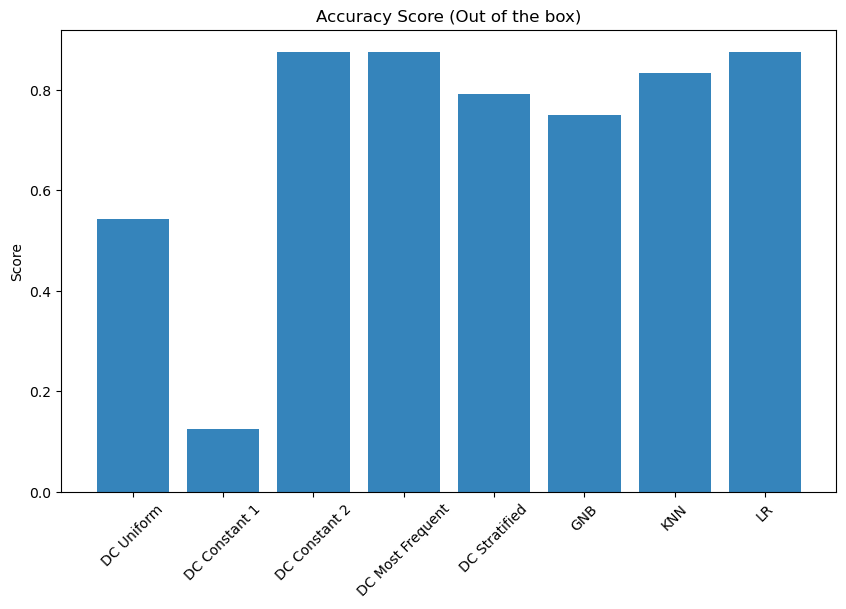

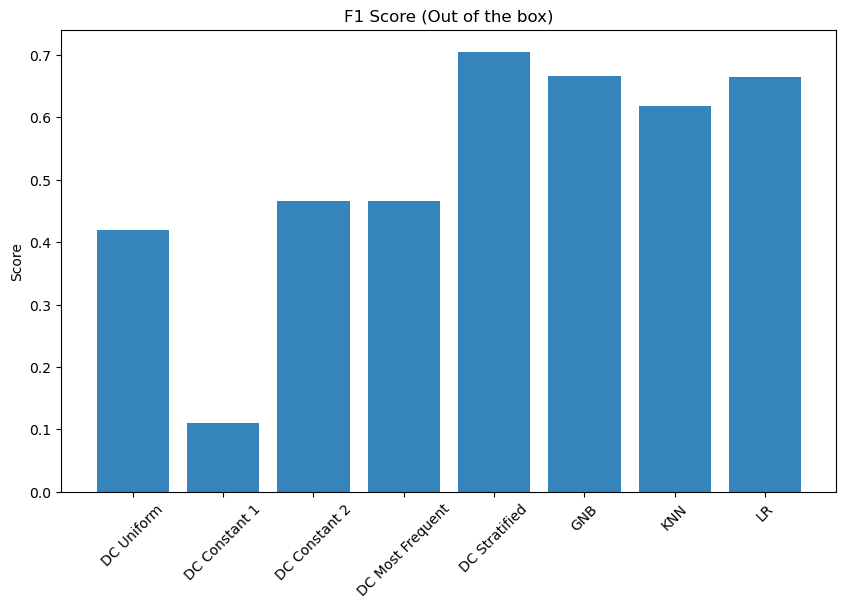

In [ ]:
classifier_labels = list(accuracy.keys())
classifier_accuracy = list(accuracy.values())
classifier_f1 = list(f1.values())

bar_plot(classifier_labels, classifier_accuracy, "Accuracy Score (Out of the box)")
bar_plot(classifier_labels, classifier_f1, "F1 Score (Out of the box)")

### Παρατηρήσεις
1. Στον Dummy ταξονομητή παρατηρούμε πως σύμφωνα με το accuracy score οι τεχνικές DC Constant 2 και DC Most Frequent έχουν το περισσότερο accuracy score. Η κλάση 2('LIVE') έχει τα περισσότερα δείγματα και για αυτό το αποτέλεσμα που βλέπουμε έιναι λογικό. Ωστόσο σύμφωνα με το F1 Score βλέπουμε ότι οι δύο αυτές τεχνικές δεν έχουν τόσο καλή επίδοση αφού έχουν πολλά False Positive. Σε αντίθεση η τεχνική DC Uniform τα πηγαίνει λίγο καλύτερα απο τις υπόλοιπες.
2. Συγκρίνοντας τους υπόλοιπους 3 ταξινομητές(GNB, KNN, LR) με τον Dummy φαίνεται πως έχουν καλύτερες επιδόσεις χωρίς κάποια βελτιστοποίηση. 
3. Συγκεκριμένα ο GBN και LR έχουν τις καλύτερες μετρικές.

# Βελτιστοποίηση

## Pipelines

Για την κατασκευή του μοντέλου θα βασιστούμε στην κλάση Pipeline. Επειδή οι κλάσεις εξισορρόπησης του imblearn όπως η RandomOverSampler τυπικά δεν έχουν μέθοδο transform (έχουν fit_sample) η built-in Pipeline του scikit (from sklearn.pipeline import Pipeline) δεν τις δέχεται ως transformers. Θα φέρουμε την Pipeline από το imblearn (που έχει transform για τους samplers).

###Εύρεση καλύτερων αρχιτεκτονικών Pipeline για κάθε ενα απο τους ταξινομητές:###

In [ ]:
from imblearn.pipeline import Pipeline

# known pre processing classes
from sklearn import neighbors
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

import itertools

# initialization 
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

# KNN Classifier
clf = neighbors.KNeighborsClassifier()
# LR
logisticRegr = LogisticRegression(max_iter=1000)
# GNB
gnb = GaussianNB()

# create all possible pipelines in order to get the pipelines with the 
# best accuracy_score and f1_score (might differ, might be the same)
permutationsList = []

steps = [('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca)]

for i in range (len(steps)):
  l = []
  l.append(steps[i])
  permutationsList.append(l)

for i in range (2, len(steps) + 1):
  perms = itertools.permutations(steps, i)
  for p in perms:
    permutationsList.append(list(p))

In [ ]:
def find_best_pipelines(_name, _classifier):
  for perm in permutationsList:
    # copy the list so as the permutationsList remains clean
    stepsList = perm.copy()
    # append every time to the list that was copied the classifier as the last process of the pipeline
    stepsList.append((_name.lower(), _classifier))
    # initiate pipeline
    pipe = Pipeline(steps = stepsList)
    # train, predict & calculate times
    #start_time = time.time()
    pipe.fit(train, train_labels)
    #train_time = time.time() - start_time
    #start_time = time.time()
    preds = pipe.predict(test)
    #prediction_time = time.time() - start_time
    # find current accuracy and current f1 scores of this specific pipeline
    curr_accuracy = accuracy_score(test_labels, preds)
    curr_f1 = f1_score(test_labels, preds, average = "macro")

    # update best accuracy/best fit (which pipeline and times also)
    if (accuracy_pipeline.get(_name, 0) < curr_accuracy):
      accuracy_pipeline[_name] = curr_accuracy
      pipeline_best_accuracy = perm.copy()
    if (f1_pipeline.get(_name, 0) < curr_f1):
      f1_pipeline[_name] = curr_f1
      pipeline_best_f1 = perm.copy()
  
  return (pipeline_best_accuracy, pipeline_best_f1)

### Dummy
Λόγο του ότι ο συγκερκιμένος ταξινομητής χρησιμοποιεί πού συγκερκιμένες στρατηγικές για να κάνει τις προβλέψεις του.Ο μόνος τρόπος για να βελτιώσει τα αποτελέσματα του είναι με resampling και πάλι όμως δεν θα έχουν κάποια σημαντική διαφορά.Επομένως δεν έχει κάποιο νοήμα να τον συγκρίνουμε με τους υπόλοιπους ταξιονητές μιας και θα έχει χειρότερα αποτελέσματα.

### GNB

In [ ]:
accuracy_pipeline = {}
f1_pipeline = {}


gnb_pipeline_best_acc, gnb_pipeline_best_f1 = find_best_pipelines("GNB", gnb)
print("Best accuracy score:", accuracy_pipeline["GNB"])
gnb_pipeline_best_acc.append(("gnb", gnb))
print("Best pipeline based on accuracy score:", gnb_pipeline_best_acc)
gnb_pipeline_best_f1.append(("gnb", gnb))
print("Best F1 score:", f1_pipeline["GNB"])
print("Best pipeline based on f1 score:", gnb_pipeline_best_f1)

Best accuracy score: 0.9166666666666666
Best pipeline based on accuracy score: [('scaler', StandardScaler()), ('pca', PCA()), ('sampler', RandomOverSampler()), ('gnb', GaussianNB())]
Best F1 score: 0.8095238095238095
Best pipeline based on f1 score: [('scaler', StandardScaler()), ('pca', PCA()), ('sampler', RandomOverSampler()), ('gnb', GaussianNB())]


### KNN

In [ ]:
knn_pipeline_best_acc, knn_pipeline_best_f1 = find_best_pipelines("KNN", clf)
print("Best accuracy score:", accuracy_pipeline["KNN"])
knn_pipeline_best_acc.append(("kNN", clf))
print("Best pipeline based on accuracy score:", knn_pipeline_best_acc)
knn_pipeline_best_f1.append(("kNN", clf))
print("Best F1 score:", f1_pipeline["KNN"])
print("Best pipeline based on f1 score:", knn_pipeline_best_f1)

Best accuracy score: 0.875
Best pipeline based on accuracy score: [('scaler', StandardScaler()), ('kNN', KNeighborsClassifier())]
Best F1 score: 0.7491289198606272
Best pipeline based on f1 score: [('sampler', RandomOverSampler()), ('scaler', StandardScaler()), ('kNN', KNeighborsClassifier())]


### LR

In [ ]:
lr_pipeline_best_acc, lr_pipeline_best_f1 = find_best_pipelines("LR", logisticRegr,)
print("Best accuracy score:", accuracy_pipeline["LR"])
lr_pipeline_best_acc.append(("lr", logisticRegr))
print("Best pipeline based on accuracy score:", lr_pipeline_best_acc)
lr_pipeline_best_f1.append(("lr", logisticRegr))
print("Best F1 score:", f1_pipeline["LR"])
print("Best pipeline based on f1 score:", lr_pipeline_best_f1)

Best accuracy score: 0.9166666666666666
Best pipeline based on accuracy score: [('scaler', StandardScaler()), ('sampler', RandomOverSampler()), ('lr', LogisticRegression(max_iter=1000))]
Best F1 score: 0.8095238095238095
Best pipeline based on f1 score: [('scaler', StandardScaler()), ('sampler', RandomOverSampler()), ('lr', LogisticRegression(max_iter=1000))]


## Αποτελέσματα καλύτερων αρχιτεκτονικών Pipeline:


In [ ]:
data = []
data.append(list(accuracy_pipeline.values()))
data.append(list(f1_pipeline.values()))

pd.DataFrame(data, index = ["Accuracy Score", "F1 Score"], columns = list(accuracy_pipeline.keys()))

,GNB,KNN,LR
Accuracy Score,0.916667,0.875000,0.916667
F1 Score,0.809524,0.749129,0.809524


### Eύρεση βέλτιστων υπερπαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση για κάθε score: ###


*Μετατρέψαμε τα περιεχόμενα του dataset σε float για να δουλέψει η συνάρτηση train.var(axis = 0)*

In [ ]:
train = train.astype(float)

In [ ]:
from sklearn.model_selection import GridSearchCV

# calculate the variance of the train set to determine which values
# we should include as vthreshold

train_var = train.var(axis = 0)
print("min variance: ", np.min(train_var))
print("max variance: ", np.max(train_var))
max_variance = np.max(train_var)

# create vthreshold (for every classifier)
#προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
vthreshold = list(np.arange(start = 0, stop = int(max_variance) + 1, step = 500))
print(vthreshold)

# GNB no params opt

# KNN Classifier
weights = ['distance', 'uniform']
metric = ['manhattan', 'euclidean', 'minkowski']
k_neighbors = [1, 5, 10, 20, 30, 40, 50]

# LR Classifier
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [100, 200, 300, 400, 500]
     

min variance:  0.09566326530612247
max variance:  4619.711415816327
[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]


#### GNB

In [ ]:
accuracy_gridsearch = {}
f1_gridsearch = {}

gnb_gridsearch_acc_dict = {}
gnb_gridsearch_f1_dict = {}

train_time_gridsearch = {}
pred_time_gridsearch = {}

#Accuracy Pipeline

# create best pipeline
pipe_acc_gnb = Pipeline(steps = gnb_pipeline_best_acc, memory = "tmp")

# append necessary attrs to the accuracy dictionary
if ('selector', selector) in gnb_pipeline_best_acc:
  if ('scaler', scaler) not in gnb_pipeline_best_acc:
    gnb_gridsearch_acc_dict["selector__threshold"] = vthreshold
  if ('scaler', scaler) in gnb_pipeline_best_acc:
    if gnb_pipeline_best_acc.index(('scaler', scaler)) > gnb_pipeline_best_acc.index(('selector', selector)):
      gnb_gridsearch_acc_dict["selector__threshold"] = vthreshold

estimator_acc_gnb = GridSearchCV(pipe_acc_gnb, gnb_gridsearch_acc_dict, cv = 10, scoring = "accuracy", n_jobs = -1)

start_time = time.time()
estimator_acc_gnb.fit(train, train_labels)
train_time_gridsearch["GNB accuracy"] = time.time() - start_time

start_time = time.time()
pred_estimator_acc_gnb = estimator_acc_gnb.predict(test)
pred_time_gridsearch["GNB accuracy"] = time.time() - start_time

accuracy_gridsearch["GNB"] = accuracy_score(test_labels, pred_estimator_acc_gnb)

print("\033[4m\033[1mBest estimator and params for accuracy score - GNB\033[0m\n")
print(estimator_acc_gnb.best_estimator_)
print(estimator_acc_gnb.best_params_)

print("\n\n")

#F1 Pipe Line

# create best pipeline
pipe_f1_gnb = Pipeline(steps = gnb_pipeline_best_f1, memory = "tmp")

# append necessary attrs to the f1 dictionary
if ('selector', selector) in gnb_pipeline_best_f1:
  if ('scaler', scaler) not in gnb_pipeline_best_f1:
    gnb_gridsearch_f1_dict["selector__threshold"] = vthreshold
  if ('scaler', scaler) in gnb_pipeline_best_f1:
    if gnb_pipeline_best_f1.index(('scaler', scaler)) > gnb_pipeline_best_f1.index(('selector', selector)):
      gnb_gridsearch_f1_dict["selector__threshold"] = vthreshold
  
estimator_f1_gnb = GridSearchCV(pipe_f1_gnb, gnb_gridsearch_f1_dict, cv = 10, scoring = "f1_macro", n_jobs = -1)

start_time = time.time()
estimator_f1_gnb.fit(train, train_labels)
train_time_gridsearch["GNB f1"] = time.time() - start_time

start_time = time.time()
pred_estimator_f1_gnb = estimator_f1_gnb.predict(test)
pred_time_gridsearch["GNB f1"] = time.time() - start_time

f1_gridsearch["GNB"] = f1_score(test_labels, pred_estimator_f1_gnb, average = "macro")

print("\033[4m\033[1mBest estimator and params for f1 score - GNB\033[0m\n")
print(estimator_f1_gnb.best_estimator_)
print(estimator_f1_gnb.best_params_)

Best estimator and params for accuracy score - GNB

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('sampler', RandomOverSampler()), ('gnb', GaussianNB())])
{}



Best estimator and params for f1 score - GNB

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('sampler', RandomOverSampler()), ('gnb', GaussianNB())])
{}


Παρατηρούμε πως η εύρεση βέλτιστων υπερμαραμέτρων δεν οφέλησε την απόδοση του ταξινομητή GNB αφού η μόνη υπερπαράμετρος που χρησιμοποιήθηκε ήταν το threshold το οποίο είχε την τιμή μηδέν. Οπότε οι βελτιώσεις στην απόδοση του ταξινομητή οφείλονται αποκλειστικά στο pipeline. Επίσης και στις δύο περιπτώσεις χρησιμοποιήθηκε το ίδιο pipeline.

#### KNN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

knn_gridsearch_acc_dict = {}
knn_gridsearch_f1_dict = {}
# Accuracy pipeline
# create best pipeline
pipe_acc_knn = Pipeline(steps = knn_pipeline_best_acc, memory = "tmp")

# append necessary attrs to the accuracy dictionary
knn_gridsearch_acc_dict["kNN__n_neighbors"] = k_neighbors
knn_gridsearch_acc_dict["kNN__weights"] = weights
knn_gridsearch_acc_dict["kNN__metric"] = metric

if ('selector', selector) in knn_pipeline_best_acc:
  if ('scaler', scaler) not in knn_pipeline_best_acc:
      knn_gridsearch_acc_dict["selector__threshold"] = vthreshold
  if ('scaler', scaler) in knn_pipeline_best_acc:
    if knn_pipeline_best_acc.index(('scaler', scaler)) > knn_pipeline_best_acc.index(('selector', selector)):
        knn_gridsearch_acc_dict["selector__threshold"] = vthreshold

estimator_acc_knn = GridSearchCV(pipe_acc_knn, knn_gridsearch_acc_dict, cv = 10, scoring = "accuracy", n_jobs = -1)

start_time = time.time()
estimator_acc_knn.fit(train, train_labels)
train_time_gridsearch["KNN accuracy"] = time.time() - start_time

start_time = time.time()
pred_estimator_acc_knn = estimator_acc_knn.predict(test)
pred_time_gridsearch["KNN accuracy"] = time.time() - start_time

accuracy_gridsearch["KNN"] = accuracy_score(test_labels, pred_estimator_acc_knn)

print("\033[4m\033[1mBest estimator and params for accuracy score - KNN\033[0m\n")
print(estimator_acc_knn.best_estimator_)
print(estimator_acc_knn.best_params_)

print("\n\n")

# create best pipeline
pipe_f1_knn = Pipeline(steps = knn_pipeline_best_f1, memory = "tmp")

# append necessary attrs to the f1 dictionary
knn_gridsearch_f1_dict["kNN__n_neighbors"] = k_neighbors
knn_gridsearch_f1_dict["kNN__weights"] = weights
knn_gridsearch_f1_dict["kNN__metric"] = metric

if ('selector', selector) in knn_pipeline_best_f1:
  if ('scaler', scaler) not in knn_pipeline_best_f1:
      knn_gridsearch_f1_dict["selector__threshold"] = vthreshold
  if ('scaler', scaler) in knn_pipeline_best_f1:
    if knn_pipeline_best_f1.index(('scaler', scaler)) > knn_pipeline_best_f1.index(('selector', selector)):
        knn_gridsearch_f1_dict["selector__threshold"] = vthreshold

estimator_f1_knn = GridSearchCV(pipe_f1_knn, knn_gridsearch_f1_dict, cv = 10, scoring = "f1_macro", n_jobs = -1)

start_time = time.time()
estimator_f1_knn.fit(train, train_labels)
train_time_gridsearch["KNN f1"] = time.time() - start_time

start_time = time.time()
pred_estimator_f1_knn = estimator_f1_knn.predict(test)
pred_time_gridsearch["KNN f1"] = time.time() - start_time

f1_gridsearch["KNN"] = f1_score(test_labels, pred_estimator_f1_knn, average = "macro")

print("\033[4m\033[1mBest estimator and params for f1 score - KNN\033[0m\n")
print(estimator_f1_knn.best_estimator_)
print(estimator_f1_knn.best_params_)

Best estimator and params for accuracy score - KNN

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()),
                ('kNN',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=10,
                                      weights='distance'))])
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 10, 'kNN__weights': 'distance'}



Best estimator and params for f1 score - KNN

Pipeline(memory='tmp',
         steps=[('sampler', RandomOverSampler()), ('scaler', StandardScaler()),
                ('kNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=1,
                                      weights='distance'))])
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'distance'}


Ο αριθμός των κοντινότερων γειτόνων είναι διαφορετικός δηλαδή 10 για accuracy και 30 για f1 score. Το threshold του selector είναι μηδέν που σημαίνει οτι δεν βοήθησε στην βελτιστοποίηση.

Επιπλέον, παρατηρείται ότι για κάθε μια μετρική o βέλτιστος συνδυασμός υπερπαραμέτρων και pipeline ήταν διαφορετικός.

#### LR

In [ ]:
lr_gridsearch_acc_dict = {}
lr_gridsearch_f1_dict = {}

#Accuracy Pipeline

# create best pipeline
pipe_acc_lr = Pipeline(steps = lr_pipeline_best_acc, memory = "tmp")

# append necessary attrs to the accuracy dictionary
lr_gridsearch_acc_dict["lr__solver"] = solver
lr_gridsearch_acc_dict["lr__max_iter"] = max_iter

if ('selector', selector) in lr_pipeline_best_acc:
  if ('scaler', scaler) not in lr_pipeline_best_acc:
      lr_gridsearch_acc_dict["selector__threshold"] = vthreshold
  if ('scaler', scaler) in lr_pipeline_best_acc:
    if lr_pipeline_best_acc.index(('scaler', scaler)) > lr_pipeline_best_acc.index(('selector', selector)):
        lr_gridsearch_acc_dict["selector__threshold"] = vthreshold

estimator_acc_lr = GridSearchCV(pipe_acc_lr, lr_gridsearch_acc_dict, cv = 10, scoring = "accuracy", n_jobs = -1)

start_time = time.time()
estimator_acc_lr.fit(train, train_labels)
train_time_gridsearch["LR accuracy"] = time.time() - start_time

start_time = time.time()
pred_estimator_acc_lr = estimator_acc_lr.predict(test)
pred_time_gridsearch["LR accuracy"] = time.time() - start_time

accuracy_gridsearch["LR"] = accuracy_score(test_labels, pred_estimator_acc_lr)

print("\033[4m\033[1mBest estimator and params for accuracy score - LR\033[0m\n")
print(estimator_acc_lr.best_estimator_)
print(estimator_acc_lr.best_params_)

print("\n\n")
#F1 Pipeline 

# create best pipeline
pipe_f1_lr = Pipeline(steps = lr_pipeline_best_f1, memory = "tmp")

# append necessary attrs to the f1 dictionary
lr_gridsearch_f1_dict["lr__solver"] = solver
lr_gridsearch_f1_dict["lr__max_iter"] = max_iter

if ('selector', selector) in lr_pipeline_best_f1:
  if ('scaler', scaler) not in lr_pipeline_best_f1:
      lr_gridsearch_f1_dict["selector__threshold"] = vthreshold
  if ('scaler', scaler) in lr_pipeline_best_f1:
    if lr_pipeline_best_f1.index(('scaler', scaler)) > lr_pipeline_best_f1.index(('selector', selector)):
        lr_gridsearch_f1_dict["selector__threshold"] = vthreshold

estimator_f1_lr = GridSearchCV(pipe_f1_lr, lr_gridsearch_f1_dict, cv = 10, scoring = "f1_macro", n_jobs = -1)

start_time = time.time()
estimator_f1_lr.fit(train, train_labels)
train_time_gridsearch["LR f1"] = time.time() - start_time

start_time = time.time()
pred_estimator_f1_lr = estimator_f1_lr.predict(test)
pred_time_gridsearch["LR f1"] = time.time() - start_time

f1_gridsearch["LR"] = f1_score(test_labels, pred_estimator_f1_lr, average = "macro")

print("\033[4m\033[1mBest estimator and params for f1 score - LR\033[0m\n")
print(estimator_f1_lr.best_estimator_)
print(estimator_f1_lr.best_params_)

Best estimator and params for accuracy score - LR

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('lr', LogisticRegression(solver='liblinear'))])
{'lr__max_iter': 100, 'lr__solver': 'liblinear'}



Best estimator and params for f1 score - LR

Pipeline(memory='tmp',
         steps=[('scaler', StandardScaler()), ('sampler', RandomOverSampler()),
                ('lr', LogisticRegression(solver='liblinear'))])
{'lr__max_iter': 100, 'lr__solver': 'liblinear'}


Απο τα αποτελέσματα φαίνεται οτι οι βέλτιστοι ταξινομητές χρησιμοποιούν τις default παραμέτρους άρα η βελτίωση ωφείλεται καθαρά στις επιλογές των selector, samplers και scaler. 

# Αποτελέσματα και συμπεράσματα

In [ ]:
print("\033[4m\033[1mAccuracy Score\033[0m\n")
data = []
data.append(list(accuracy.values())[5:])
data.append(list(accuracy_gridsearch.values()))
pd.DataFrame(data, index = ["Out of the box", "Optimized based on Accuracy Score"], columns = list(accuracy_gridsearch.keys()))

Accuracy Score



,GNB,KNN,LR
Out of the box,0.750,0.833333,0.875000
Optimized based on Accuracy Score,0.875,0.916667,0.833333


In [ ]:
print("\033[4m\033[1mF1 Score\033[0m\n")

data = []
data.append(list(f1.values())[5:])
data.append(list(f1_gridsearch.values()))
pd.DataFrame(data, index = ["Out of the box", "Optimized based on F1 Score"], columns = list(f1_gridsearch.keys()))

F1 Score



,GNB,KNN,LR
Out of the box,0.666667,0.619048,0.665116
Optimized based on F1 Score,0.665116,0.809524,0.619048


In [ ]:
print("\033[4m\033[1mTrain Time (sec)\033[0m\n")

data = []
data.append(list(train_time_base.values()))
train_time_accuracy = [
     train_time_gridsearch["GNB accuracy"],
     train_time_gridsearch["KNN accuracy"],
     train_time_gridsearch["LR accuracy"]
]
data.append(train_time_accuracy)
pd.DataFrame(data, index = ["Out of the box", "Optimized based on Accuracy Score"], columns = list(accuracy_gridsearch.keys()))

Train Time (sec)



,GNB,KNN,LR
Out of the box,0.00100,0.000997,0.045267
Optimized based on Accuracy Score,4.17422,0.648480,0.573715


In [ ]:
print("\033[4m\033[1mPrediction Time (sec)\033[0m\n")

data = []
data.append(list(pred_time_base.values()))
pred_time_accuracy = [
     pred_time_gridsearch["GNB accuracy"],
     pred_time_gridsearch["KNN accuracy"],
     pred_time_gridsearch["LR accuracy"]
]
data.append(pred_time_accuracy)
pd.DataFrame(data, index = ["Out of the box", "Optimized based on Accuracy Score"], columns = list(accuracy_gridsearch.keys()))

Prediction Time (sec)



,GNB,KNN,LR
Out of the box,0.000998,0.004988,0.0
Optimized based on Accuracy Score,0.000997,0.003989,0.0


In [ ]:
print("\033[4m\033[1mTrain Time (sec)\033[0m\n")

data = []
data.append(list(train_time_base.values()))
train_time_accuracy = [
     train_time_gridsearch["GNB f1"],
     train_time_gridsearch["KNN f1"],
     train_time_gridsearch["LR f1"]
]
data.append(train_time_accuracy)
pd.DataFrame(data, index = ["Out of the box", "Optimized based on F1 Score"], columns = list(f1_gridsearch.keys()))

Train Time (sec)



,GNB,KNN,LR
Out of the box,0.001000,0.000997,0.045267
Optimized based on F1 Score,0.709626,0.768531,0.507509


In [ ]:
print("\033[4m\033[1mPrediction Time (sec)\033[0m\n")

data = []
data.append(list(pred_time_base.values()))
pred_time_accuracy = [
     pred_time_gridsearch["GNB f1"],
     pred_time_gridsearch["KNN f1"],
     pred_time_gridsearch["LR f1"]
]
data.append(pred_time_accuracy)
pd.DataFrame(data, index = ["Out of the box", "Optimized based on F1 Score"], columns = list(f1_gridsearch.keys()))

Prediction Time (sec)



,GNB,KNN,LR
Out of the box,0.000998,0.004988,0.0
Optimized based on F1 Score,0.000000,0.005187,0.0


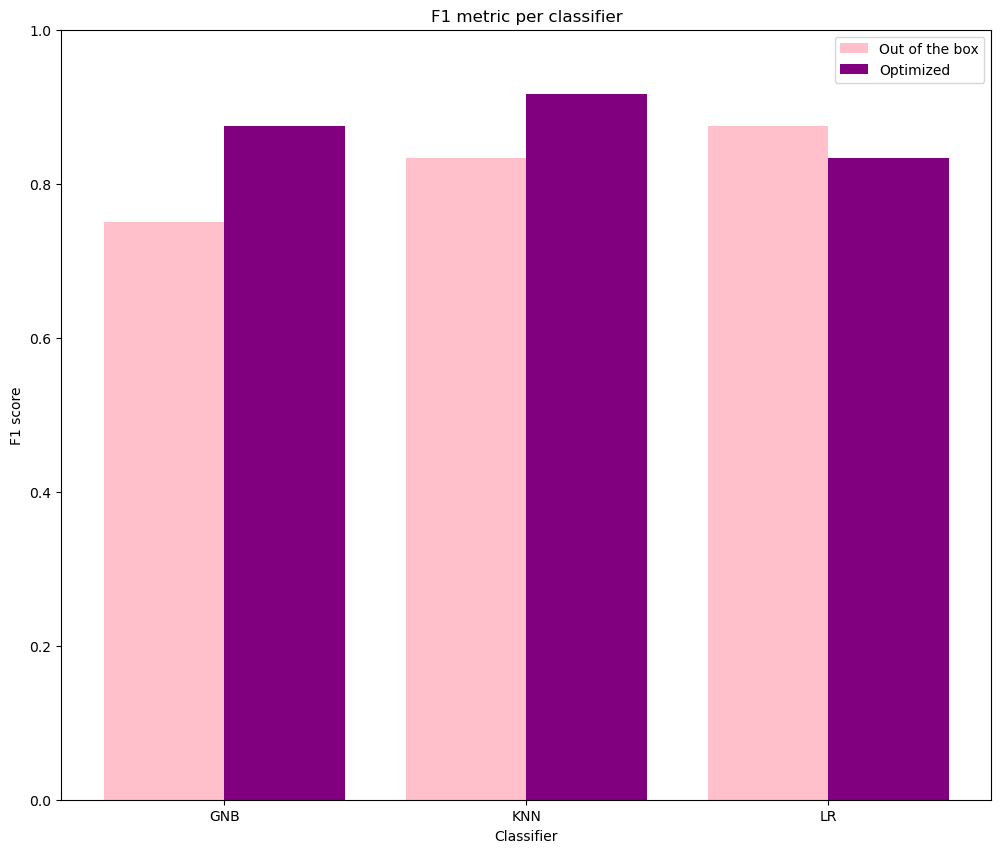

In [ ]:
X = ['GNB','KNN', 'LR']
ootb = list(accuracy.values())[5:]
opt = list(accuracy_gridsearch.values())
  
X_axis = np.arange(len(X))

plt.figure(figsize = (12,10))
plt.bar(X_axis - 0.2, ootb, 0.4, label = 'Out of the box', color = 'pink')
plt.bar(X_axis + 0.2, opt, 0.4, label = 'Optimized', color = 'purple')

plt.ylim((0,1))
plt.xticks(X_axis, X)
plt.xlabel("Classifier")
plt.ylabel("F1 score")
plt.title("F1 metric per classifier")
plt.legend()
plt.show()

Πιο πάνω φαίνονται οι συγκρίσης για το accuracy score ανα classifier.

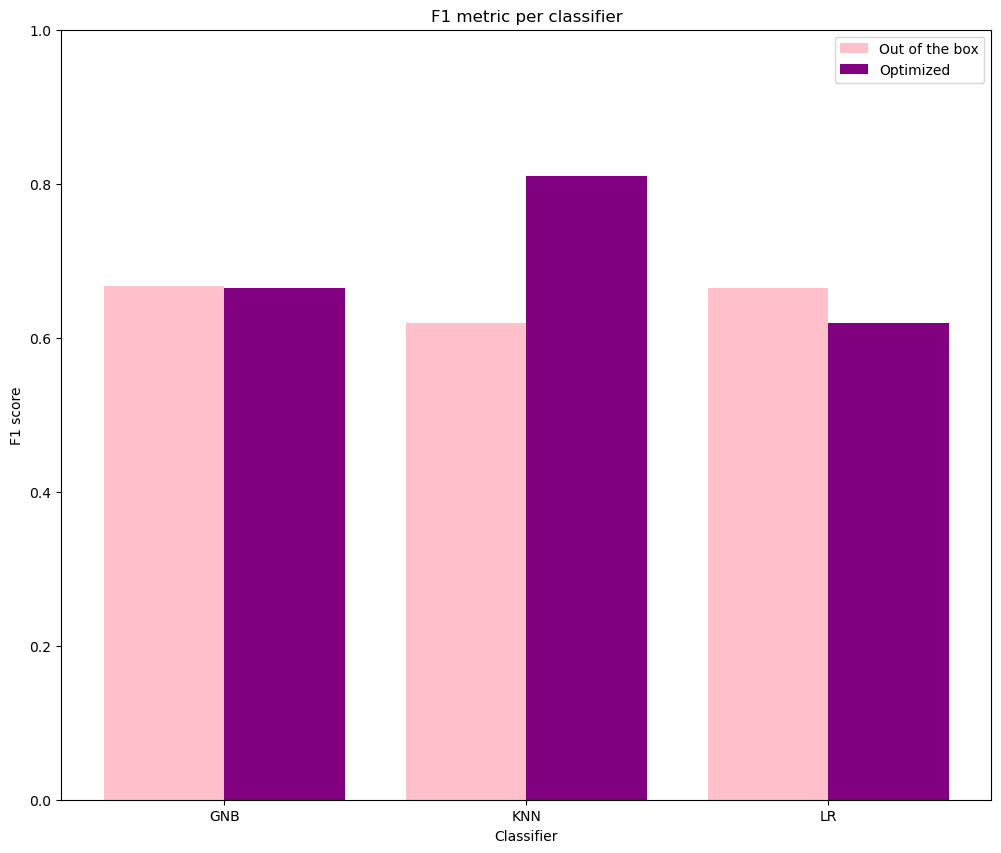

In [ ]:
X = ['GNB','KNN', 'LR']
ootb = list(f1.values())[5:]
opt = list(f1_gridsearch.values())
  
X_axis = np.arange(len(X))

plt.figure(figsize = (12,10))
plt.bar(X_axis - 0.2, ootb, 0.4, label = 'Out of the box', color = 'pink')
plt.bar(X_axis + 0.2, opt, 0.4, label = 'Optimized', color = 'purple')

plt.ylim((0,1))
plt.xticks(X_axis, X)
plt.xlabel("Classifier")
plt.ylabel("F1 score")
plt.title("F1 metric per classifier")
plt.legend()
plt.show()

Πιο πάνω φαίνονται οι συγκρίσης για το F1-score ανα classifier.


Συμπεραίνουμε ότι ο καλύτερος ταξινομητής είναι ο KNN με βελτιστοποίηση καθώς έχει το καλύτερο  F1-score συγκριτικά με τους υπόλοιπους ταξινομητές.